In [1]:
import lop

import numpy as np
import matplotlib.pyplot as plt
import pickle
import itertools
import pdb

In [2]:
pathfile = "../../other_repos/ice-soil-planner/scripts/plan_saving/rewards_ice_soil.pickle"

with open(pathfile, 'rb') as f:
    path_data = pickle.load(f)
 
num_eval = 10

eval_data = [path_d[:num_eval] for path_d in path_data['eval']]
eval_rew = [[env_p['rewards'] for env_p in data_env] for data_env in eval_data]

In [3]:
fake_function_desc = 'min'
synth_user = 'human_choice'

config = {}
config['dim_rewards'] = 5
p_synth_pair = 0.95
p_synth_abs = 0.95


#utility_f = lop.FakeLogistic(config['dim_rewards'])
utility_f = lop.FakeWeightedMin(config['dim_rewards'])
user_f = lop.HumanChoiceUser2(utility_f)

user_f.learn_beta(eval_rew, p_synth_pair, Q_size=2, p_sigma=p_synth_abs)

print('sigma = ' + str(user_f.sigma))
print('beta = ' + str(user_f.beta))

[0.        0.6751984]
sigma = 0.1345560281708229
beta = 9.086227124936219


In [4]:
vs = np.logspace(0, 3, num=20)
print(vs)

[   1.            1.43844989    2.06913808    2.97635144    4.2813324
    6.15848211    8.8586679    12.74274986   18.32980711   26.36650899
   37.92690191   54.55594781   78.47599704  112.88378917  162.37767392
  233.57214691  335.98182863  483.29302386  695.19279618 1000.        ]


In [5]:

rewards = eval_rew




#v = 10.0

acc_v = np.empty(len(vs))
std_v = np.empty(len(vs))

for l, v in enumerate(vs):

    O = 30
    N = len(rewards)
    M = len(rewards[0])

    acc = np.empty((N,M, O))
    for o in range(O):
        utility_f = lop.FakeWeightedMin(config['dim_rewards'])
        user_f = lop.HumanChoiceUser2(utility_f)

        user_f.learn_beta(eval_rew, p_synth_pair, Q_size=2, p_sigma=p_synth_abs)

        # through environments
        for i in range(N):
            # through planning problems
            for j in range(M):
                idx = i * len(rewards[0]) + j

                #samp_idx = np.random.choice(len(rewards[i][j]), N_pairs, replace=False)
                f = utility_f(rewards[i][j])
                f = f * user_f.k + user_f.b

                r = lop.sigmoid(f, k=1, b=0)
                #print(f.shape)

                pairs = np.array(list(itertools.combinations(range(f.shape[0]), 2)), dtype=int)
                #print(pairs)



                a = v * r
                b = v * (1 - r)

                beta_r = np.random.beta(a,b)

                dif_samp = beta_r[pairs[:,0]] - beta_r[pairs[:,1]]
                dif_r = r[pairs[:,0]] - r[pairs[:,1]]

                correct = np.logical_or(np.logical_and(dif_samp > 0, dif_r > 0), np.logical_and(dif_samp < 0, dif_r < 0))
                same = dif_r == 0
                sum_cor = np.sum(correct)
                pct_correct = sum_cor / (correct.shape[0] - np.sum(same))

                #print(pct_correct)
                acc[i,j, o] = pct_correct

    print(np.mean(acc))
    print(np.std(acc))
    
    acc_v[l] = np.mean(acc)
    std_v[l] = np.std(acc)
    #print(acc)



[0.         0.07089954]
[0.         0.50626563]
[0.         0.26179244]
[0.         0.64747498]
[0.        0.3324029]
[0.         0.08572135]
[0.         0.02599174]
[0.         0.19085849]
[0.         0.63283661]
[0.         0.34907529]
[0.         0.60353618]
[0.         0.36443514]
[0.         0.59589466]
[0.         0.23858245]
[0.         0.05749753]
[0.         0.38248181]
[0.         0.39056608]
[0.         0.00104764]
[0.         0.37399646]
[0.         0.28757083]
[0.         0.21230292]
[0.         0.47436785]
[0.         0.04777543]
[0.         0.53041963]
[0.        0.0354755]
[0.         0.25539784]
[0.         0.19947929]
[0.        0.1873912]
[0.         0.06415601]
[0.        0.0222775]
0.6865624657837309
0.055489420878978984
[0.         0.48895541]
[0.         0.05412742]
[0.         0.34584456]
[0.         0.31127686]
[0.         0.45894937]
[0.         0.01094644]
[0.        0.2398521]
[0.         0.37808609]
[0.         0.19985071]
[0.         0.57864292]
[0.       

0.8602460196511413
0.0916339497880244
[0.         0.62040068]
[0.         0.62118485]
[0.         0.10229534]
[0.         0.06699928]
[0.         0.30799285]
[0.         0.00141984]
[0.         0.25583362]
[0.        0.2942217]
[0.         0.56134346]
[0.         0.26766619]
[0.         0.11543374]
[0.         0.24145105]
[0.         0.12381319]
[0.         0.22764695]
[0.         0.43773662]
[0.         0.05841354]
[0.         0.30373418]
[0.         0.51264195]
[0.         0.07656699]
[0.         0.16338491]
[0.         0.07303469]
[0.         0.15859792]
[0.         0.04616168]
[0.         0.33798319]
[0.         0.16419894]
[0.        0.3656828]
[0.         0.13670304]
[0.         0.28095003]
[0.         0.45164619]
[0.         0.00172992]
0.870782039372826
0.08967902982072569
[0.         0.71225255]
[0.       0.417313]
[0.         0.12254814]
[0.         0.13509067]
[0.         0.30186833]
[0.         0.23851919]
[0.         0.21646039]
[0.         0.03724636]
[0.         0.770403

Text(0, 0.5, 'v')

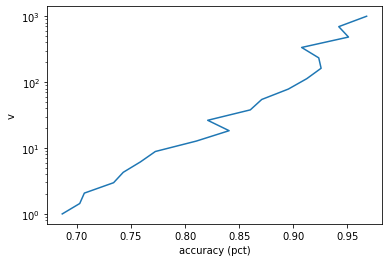

In [7]:
plt.plot(acc_v, vs)
plt.xlabel('accuracy (pct)')
plt.gca().set_yscale('log')
plt.ylabel('v')

In [ ]:

rewards = eval_rew

#v = 10.0

acc_v = np.empty(len(vs))
std_v = np.empty(len(vs))

for l, v in enumerate(vs):

    O = 30
    N = len(rewards)
    M = len(rewards[0])

    acc = np.empty((N,M, O))
    for o in range(O):
        utility_f = lop.FakeLogistic(config['dim_rewards'])
        user_f = lop.HumanChoiceUser2(utility_f)

        user_f.learn_beta(eval_rew, p_synth_pair, Q_size=2, p_sigma=p_synth_abs)

        # through environments
        for i in range(N):
            # through planning problems
            for j in range(M):
                idx = i * len(rewards[0]) + j

                #samp_idx = np.random.choice(len(rewards[i][j]), N_pairs, replace=False)
                f = utility_f(rewards[i][j])
                f = f * user_f.k + user_f.b

                r = lop.sigmoid(f, k=1, b=0)
                #print(f.shape)

                pairs = np.array(list(itertools.combinations(range(f.shape[0]), 2)), dtype=int)
                #print(pairs)



                a = v * r
                b = v * (1 - r)

                beta_r = np.random.beta(a,b)

                dif_samp = beta_r[pairs[:,0]] - beta_r[pairs[:,1]]
                dif_r = r[pairs[:,0]] - r[pairs[:,1]]

                correct = np.logical_or(np.logical_and(dif_samp > 0, dif_r > 0), np.logical_and(dif_samp < 0, dif_r < 0))
                same = dif_r == 0
                sum_cor = np.sum(correct)
                pct_correct = sum_cor / (correct.shape[0] - np.sum(same))

                #print(pct_correct)
                acc[i,j, o] = pct_correct

    print(np.mean(acc))
    print(np.std(acc))
    
    acc_v[l] = np.mean(acc)
    std_v[l] = np.std(acc)
    #print(acc)

plt.plot(acc_v, vs)
plt.xlabel('accuracy (pct)')
plt.gca().set_yscale('log')
plt.ylabel('v')
plt.show()

[0.3246992  0.68545039]
[0.17850259 0.41791197]
[0.53334908 0.6468974 ]
[0.34276035 0.67151363]
[0.36119624 0.72419954]
[0.33367861 0.55599541]
[0.35183157 0.66541632]
[0.52482259 0.57572334]
[0.26259289 0.43410819]
[0.31882407 0.54384773]
[0.5882448  0.85840798]
[0.25751553 0.54625357]
[0.47440103 0.69232283]
[0.41473993 0.73317109]
[0.42741234 0.79029073]
[0.37819933 0.7198127 ]
[0.22898541 0.51353562]
[0.41801786 0.5717239 ]
[0.26018979 0.47630549]
[0.34080755 0.7379684 ]
[0.45071319 0.82686521]
[0.47538878 0.84483006]
[0.53740653 0.80487313]
[0.33699616 0.615749  ]
[0.24030427 0.50203946]
[0.49676266 0.86683883]
[0.15614168 0.37040237]
[0.33853555 0.56753073]
[0.56986979 0.72418396]
[0.40804947 0.60284823]
0.599235574493834
0.027530208993884756
[0.26096329 0.52732644]
[0.39492502 0.72067815]
[0.45171133 0.64181537]
[0.18489834 0.61396342]
[0.42369504 0.65660352]
[0.32747974 0.73920994]
[0.46727909 0.73417983]
[0.21650169 0.46286554]
[0.27601174 0.60747103]
[0.27672736 0.55670547]
[

[0.58209222 0.85062016]
[0.41982514 0.73066761]
[0.50641304 0.75036971]
[0.3145945  0.58507228]
0.7792394136447921
0.040304596701809504
[0.46128493 0.70243559]
[0.44792427 0.78848812]
[0.31708117 0.52873698]
[0.22298933 0.60348964]
[0.56786214 0.77079259]
[0.37334507 0.54377338]
[0.24380871 0.36434046]
[0.32760046 0.64577067]
[0.41996969 0.64876203]
[0.28913308 0.47403162]
[0.59361152 0.81312708]
[0.3475267  0.55448015]
[0.2613532  0.46421795]
[0.46339519 0.81962838]
[0.57185994 0.81062123]
[0.41130585 0.72024986]
[0.48112573 0.75058574]
[0.42851098 0.73953375]
[0.55579451 0.73240256]
[0.54207785 0.7352075 ]
[0.28778679 0.52342859]
[0.44626399 0.75230049]
[0.21125079 0.38557423]
[0.28095328 0.49709258]
[0.36489355 0.55166371]
[0.44174369 0.63355048]
[0.48874379 0.78857958]
[0.47553243 0.63907376]
[0.63762307 0.87061059]
[0.35301433 0.59761021]
0.8164190962667135
0.0318025252424989
[0.45072802 0.6643616 ]
[0.65764557 0.90104384]
[0.42257059 0.73301756]
[0.58316581 0.89159627]
[0.3126396